# Chronic Pain

In [20]:
import sumProduct as sp
import numpy as np
import graphviz as gp
import subprocess
import matplotlib.pyplot as plt
import numpy as np

In [21]:
factors = []
variables = []
hidden = []
sensory = []
allNodes = []

In [22]:
vlist=['P'+str(i) for i in range(30)]
hidden=[sp.variableNode(name, vrange=['pain','nopain']) for name in vlist]
len(hidden)

30

In [23]:
Slist=['S'+str(i) for i in range(30)]
sensory=[sp.variableNode(name, vrange=['tickle','noci']) for name in Slist]
variables=hidden+sensory
print(len(variables))

60


In [26]:
a = [[0.8,0,0.2,0], 
     [1,1,0,0], 
     [0,0.8,0,0.2], 
     [0,0,1,1]]

In [31]:
print(a)

[[0.8, 0, 0.2, 0], [1, 1, 0, 0], [0, 0.8, 0, 0.2], [0, 0, 1, 1]]


In [32]:
b = np.array([0.8,1,0.2,1])

In [37]:
# Muss man noch irgendwo sagen dass a+x=b??

In [33]:
x = np.linalg.solve(a,b)

LinAlgError: Singular matrix

In [34]:
# prüfen ob die Lösung korrekt ist: wenn hier True erscheint
np.allclose(np.dot(a,x), b)

False

In [5]:
pT0=sp.factorNode()
pT0.addNeighbour(hidden[0])

def PT0(x):
    T1,=x
    if T1=='pain':
        return 0.7
    if T1=='nopain':
        return 0.3
    raise ValueError('Invalid argument'+str(x))
pT0.setValues(PT0)
factors+=[pT0]
print(len(factors))

1


In [6]:
def pTgivenT(x):
    T2,T1=x
    if T1=='pain' and T2=='pain':
        return 0.8
    if T1=='pain' and T2=='nopain':
        return 0.2
    if T1=='nopain' and T2=='pain':
        return 0.8
    if T1=='nopain' and T2=='nopain':
        return 0.2  
    raise ValueError('Invalid argument'+str(x))

def pSgivenT(x):
    S1,T1=x
    if S1=='tickle' and T1=='nopain':
        return 0.2
    if S1=='noci' and T1=='nopain':
        return 0.1
    if S1=='tickle' and T1=='pain':
        return 0.8
    if S1=='noci' and T1=='pain':
        return 0.9
    raise ValueError('Invalid argument'+str(x))

In [7]:
parent=hidden[0]

for child in hidden[1:]:
        p=sp.factorNode()
        p.addNeighbour(child)
        p.addNeighbour(parent)
        p.setValues(pTgivenT)
        s=sp.factorNode()
        factors+=[p]
        parent=child

child = sensory[0]

for s,h in zip(hidden,sensory):
    f=sp.factorNode()
    f.addNeighbour(h)
    f.addNeighbour(s)
    factors+=[f]
    f.setValues(pSgivenT)

print(len(factors))

60


In [8]:
outf=open("Easier.dot","w")
outf.write(pT0.dotPrint())
outf.close()
subprocess.call("neato -T png -o Easier.png Easier.dot", shell=True)

0

<img src="files/image.png">

In [9]:
allNodes=variables+factors
sp.runSumProduct(allNodes)
for v in variables: 
    print("Node ", v.name,"has marginals ", v.marginal())

Node  P0 has marginals  ({'pain': 0.9296875000000001, 'nopain': 0.0703125}, 33386.58176607136)
Node  P1 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676056}, 33386.58176607136)
Node  P2 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P3 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P4 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P5 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P6 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P7 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676056}, 33386.58176607136)
Node  P8 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676056}, 33386.58176607136)
Node  P9 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0

In [10]:
sensory[0].observe('noci')
sp.runSumProduct(allNodes)
for v in variables: 
    print("Node ", v.name,"has marginals ", v.marginal())

Node  P0 has marginals  ({'pain': 0.9545454545454545, 'nopain': 0.04545454545454545}, 17214.956223130546)
Node  P1 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130543)
Node  P2 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130543)
Node  P3 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130543)
Node  P4 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130543)
Node  P5 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130543)
Node  P6 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130543)
Node  P7 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130546)
Node  P8 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17214.956223130543)
Node  P9 has marginals  ({'pain': 0.9577464788

In [11]:
sensory[0].observe()
sensory[1].observe('noci')
sp.runSumProduct(allNodes)
S1nocisurprise=[]
for node in sensory: 
    S1nocisurprise.append(node.marginal()[1])
print(S1nocisurprise)

[17398.641202037183, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194, 17398.641202037194]


In [12]:
sensory[0].observe()
sensory[1].observe()
sensory[2].observe('noci')
sp.runSumProduct(allNodes)
S2nocisurprise=[]
for node in sensory: 
    S2nocisurprise.append(node.marginal()[1])
print(S2nocisurprise)

[17398.641202037183, 17398.641202037186, 17398.641202037183, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.641202037175, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718]


In [13]:
sensory[2].observe()
sensory[3].observe('noci')
sp.runSumProduct(allNodes)
S3nocisurprise=[]
for node in sensory: 
    S3nocisurprise.append(node.marginal()[1])
print(S3nocisurprise)

[17398.641202037183, 17398.641202037186, 17398.64120203718, 17398.641202037183, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.641202037186, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.641202037175, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718, 17398.64120203718]


### Die Werte für die surprise scheinen recht stark abhängig von den Prior Parameter settings!

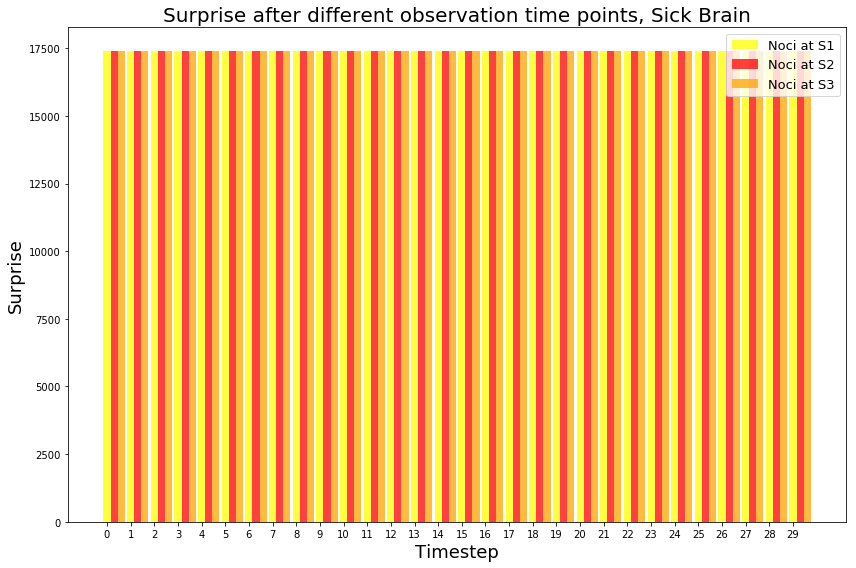

In [14]:
bar_width = 0.3
opacity = 0.9
index=np.arange(len(hidden))

plt.figure(figsize=(12.0,8.0))
plt.title("Surprise after different observation time points, Sick Brain", fontsize=20)
plt.ylabel("Surprise", fontsize=18)
plt.xlabel("Timestep", fontsize=18)
plt.xticks(index)

plt.bar(index, height=S1nocisurprise, width=bar_width, align='center', alpha=0.75, label='Noci at S1', color='yellow')
plt.bar(index+bar_width, height=S2nocisurprise, width=bar_width, align='center', alpha=0.75, label='Noci at S2', color='red')
plt.bar(index+2*bar_width, height=S3nocisurprise, width=bar_width, align='center', alpha=0.75, label='Noci at S3', color='orange')

plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig("Surprise_Sick_NociTimepoint.png")
plt.show()


## Was man hier erwarten würde: je später der nociceptive Stimulus gegeben wird, desto weniger überraschend sollte er sein!

In [15]:
sensory[1].observe('tickle')
sp.runSumProduct(allNodes)
S0ticklesurprise=[]
for node in sensory: 
    S0ticklesurprise.append(node.marginal()[1])
print(S0ticklesurprise)

[8331.743674214991, 8331.74367421499, 8331.743674214988, 8331.743674214988, 8331.743674214988, 8331.74367421499, 8331.74367421499, 8331.74367421499, 8331.74367421499, 8331.743674214991, 8331.743674214991, 8331.743674214991, 8331.743674214991, 8331.74367421499, 8331.743674214991, 8331.74367421499, 8331.74367421499, 8331.743674214988, 8331.74367421499, 8331.74367421499, 8331.743674214988, 8331.743674214988, 8331.743674214988, 8331.743674214988, 8331.743674214988, 8331.743674214988, 8331.743674214988, 8331.74367421499, 8331.74367421499, 8331.743674214988]


In [16]:
# Pain Plot
sensory[1].observe()
marginals=[]
pain_prob=[]
sp.runSumProduct(allNodes)
for v in variables: 
    print(v.marginal())

({'pain': 0.9296875, 'nopain': 0.0703125}, 17398.641202037186)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.972972972972973, 'nopain': 0.027027027027027025}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
({'pain': 0.9577464788732395, 'nopa

In [17]:
for h in hidden: 
    marginals.append(h.marginal()[0])
print(marginals)

[{'pain': 0.9296875, 'nopain': 0.0703125}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.972972972972973, 'nopain': 0.027027027027027025}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.0

In [18]:
pain_prob = [d['pain'] for d in marginals]
print(pain_prob)
nopain_prob = [d['nopain'] for d in marginals]
print(nopain_prob)

[0.9296875, 0.9577464788732395, 0.9577464788732395, 0.972972972972973, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395, 0.9577464788732395]
[0.0703125, 0.04225352112676057, 0.04225352112676057, 0.027027027027027025, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676057, 0.04225352112676056, 0.0422535211267605

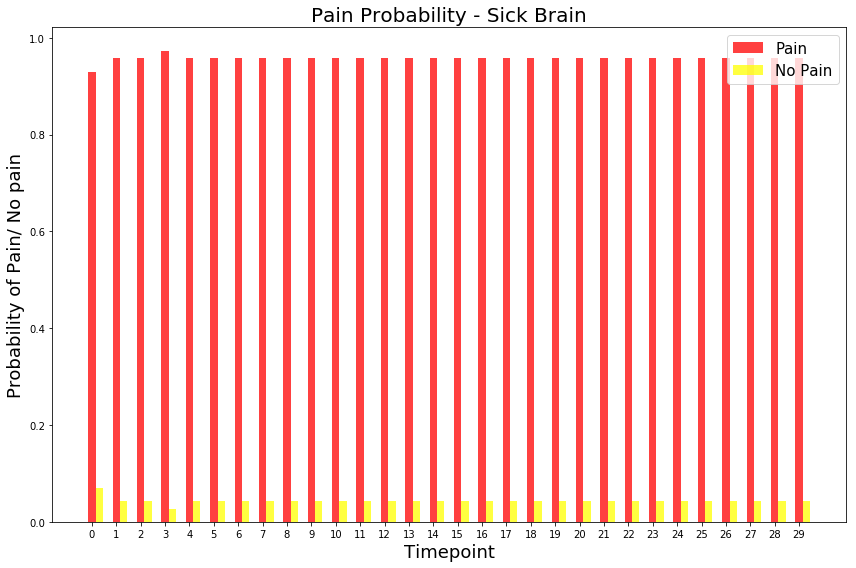

In [19]:
bar_width=0.3
opacity=0.9
index=np.arange(len(hidden))

plt.figure(figsize=(12.0,8.0))
plt.title("Pain Probability - Sick Brain", fontsize=20)
plt.ylabel('Probability of Pain/ No pain', fontsize=18)
plt.xlabel('Timepoint', fontsize=18)
plt.xticks(index)

plt.bar(index, height=pain_prob, width=bar_width, align='center', alpha=0.75, label='Pain', color='red')
plt.bar(index+bar_width, height=nopain_prob, width=bar_width, align='center', alpha=0.75, label='No Pain', color='yellow')

plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("PainProb_Sick.pdf")
plt.show()

Nächster Plot: 

S3 kriegt Noci. Was ich erwarte: die pain probability sollte da schon sehr hoch sein? Sollte mehr oder weniger unbeenflusst davon sein, ob ein nociceptiver Stimulus gegeben wird oder nicht! Pain sollte sogar ohne irgend eine observation schon sehr schnell hochgehen---

In [20]:
sensory[3].observe('noci')
sp.runSumProduct(allNodes)
marginalss3=[]

for h in hidden:   
    marginalss3.append(h.marginal()[0])
print(marginalss3)

pain_probs3 = [d['pain'] for d in marginalss3]
print(pain_prob)
nopain_probs3 = [d['nopain'] for d in marginalss3]
print(nopain_prob)

[{'pain': 0.9296875, 'nopain': 0.0703125}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.972972972972973, 'nopain': 0.027027027027027025}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, {'pain': 0.9577464788732395, 'nopain': 0.0

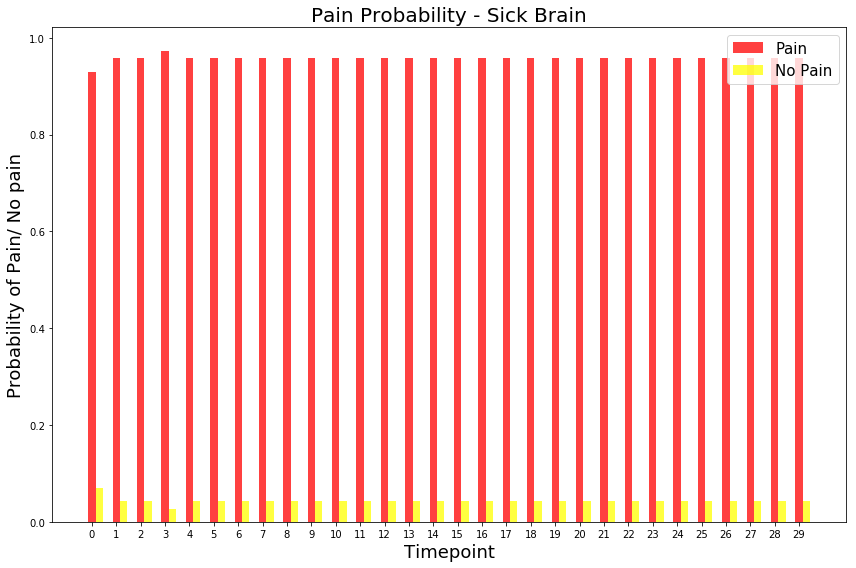

In [21]:
bar_width=0.3
opacity=0.9
index=np.arange(len(hidden))

plt.figure(figsize=(12.0,8.0))
plt.title("Pain Probability - Sick Brain", fontsize=20)
plt.ylabel('Probability of Pain/ No pain', fontsize=18)
plt.xlabel('Timepoint', fontsize=18)
plt.xticks(index)

plt.bar(index, height=pain_probs3, width=bar_width, align='center', alpha=0.75, label='Pain', color='red')
plt.bar(index+bar_width, height=nopain_probs3, width=bar_width, align='center', alpha=0.75, label='No Pain', color='yellow')

plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("PainProb_Sick.pdf")
plt.show()

In [22]:
for s in sensory: 
    s.observe()

In [23]:
sp.runSumProduct(allNodes)
for v in variables: 
    print("Node ", v.name, "has marginals ", v.marginal())

Node  P0 has marginals  ({'pain': 0.9296875000000001, 'nopain': 0.0703125}, 33386.58176607136)
Node  P1 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676056}, 33386.58176607136)
Node  P2 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P3 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P4 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P5 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P6 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 33386.58176607135)
Node  P7 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676056}, 33386.58176607136)
Node  P8 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676056}, 33386.58176607136)
Node  P9 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0

In [24]:
sensory[2].observe('noci')
sp.runSumProduct(allNodes)
for v in variables: 
    print("Node ", v.name, "has marginals ", v.marginal())

Node  P0 has marginals  ({'pain': 0.9296875, 'nopain': 0.0703125}, 17398.641202037186)
Node  P1 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
Node  P2 has marginals  ({'pain': 0.972972972972973, 'nopain': 0.027027027027027025}, 17398.641202037183)
Node  P3 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
Node  P4 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
Node  P5 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
Node  P6 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
Node  P7 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
Node  P8 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0.04225352112676057}, 17398.641202037183)
Node  P9 has marginals  ({'pain': 0.9577464788732395, 'nopain': 0

### 0. Auf dem richtigen Weg? 
# 1. Surprise
Ich werde aus den Werten nicht schlau. Warum sind sie unbeeinträchtigt von den observations? Oder habe ich irgendwo einen Fehler drin? Warum ist sie hier immer >1 in den kranken settings?
+ Wie kann ich sie nochmal umprogrammieren damit sie so formuliert ist wie bei Friston? log irgendwas?

# 2. Next steps: 
Soll ich als nächstes... 

a) mit mehr timesteps rechnen? Done. 

b) Noch mehr mit der observe Funktion plotten?

c) einen direkteren Vergleichsplot gesund - krank? 


First order markov